# H1 Paralogs
This experiment investigates the structural differences between the H1 paralogs

In [2]:
# Imports
import sys
import json
import pandas as pd
import os
import mdtraj as md

sys.path.append('../../src')
import data_utils
import analyse_utils

## Data preparation

### Templates

In [11]:
# Defining UniProt IDs / Trivial IDs
entries = {
    'H1-0': 'P07305',
    'H1-1': 'Q02539',
    'H1-2': 'P16403',
    'H1-3': 'P16402',
    'H1-4': 'P10412',
    'H1-5': 'P16401',
    'H1-6': 'P22492',
    'H1-7': 'Q75WM6',
    'H1-8': 'Q8IZA3',
    'H1-10': 'Q92522'
}

templates = pd.DataFrame({'uniprot_id': entries.values(),
                          'name': None,
                          'description': None,
                          'species': None,
                          'sequence': None},
                          index=entries.keys())

In [12]:
# Collecting metadata
for id, row in templates.iterrows():
    name, desc, spec, seq = data_utils.get_protein_metadata(row.uniprot_id)
    templates.loc[id] = {
        'uniprot_id': row.uniprot_id,
        'name': name,
        'description': desc,
        'species': spec,
        'sequence': seq}

10it [00:03,  2.52it/s]


In [13]:
# Viewing final templates
templates

,uniprot_id,name,description,species,sequence
H1-0,P07305,H10_HUMAN,Histone H1.0,Homo sapiens (Human),MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
H1-1,Q02539,H11_HUMAN,Histone H1.1,Homo sapiens (Human),MSETVPPAPAASAAPEKPLAGKKAKKPAKAAAASKKKPAGPSVSEL...
H1-2,P16403,H12_HUMAN,Histone H1.2,Homo sapiens (Human),MSETAPAAPAAAPPAEKAPVKKKAAKKAGGTPRKASGPPVSELITK...
H1-3,P16402,H13_HUMAN,Histone H1.3,Homo sapiens (Human),MSETAPLAPTIPAPAEKTPVKKKAKKAGATAGKRKASGPPVSELIT...
H1-4,P10412,H14_HUMAN,Histone H1.4,Homo sapiens (Human),MSETAPAAPAAPAPAEKTPVKKKARKSAGAAKRKASGPPVSELITK...
H1-5,P16401,H15_HUMAN,Histone H1.5,Homo sapiens (Human),MSETAPAETATPAPVEKSPAKKKATKKAAGAGAAKRKATGPPVSEL...
H1-6,P22492,H1T_HUMAN,Histone H1t,Homo sapiens (Human),MSETVPAASASAGVAAMEKLPTKKRGRKPAGLISASRKVPNLSVSK...
H1-7,Q75WM6,H1FNT_HUMAN,Testis-specific H1 histone,Homo sapiens (Human),MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...
H1-8,Q8IZA3,H18_HUMAN,Histone H1.8,Homo sapiens (Human),MAPGSVTSDISPSSTSTAGSSRSPESEKPGPSHGGVPPGGPSHSSL...
H1-10,Q92522,H1X_HUMAN,Histone H1.10,Homo sapiens (Human),MSVELEEALPVTTAEGMAKKVTKAGGSAALSPSKKRKNSKKKNQPG...


In [19]:
# Saving metadata
metadata = {'templates': templates.to_dict(orient='index')}
with open('para_h1.json', 'w') as file:
    json.dump(metadata, file, indent=4)

### IDRs

In [ ]:
# Getting template metadata
with open('para_h1.json', 'r') as file:
    metadata = json.load(file)

In [22]:
# Getting CTD
length_order=False
i_idr=-1

In [23]:
# Getting IDR regions
IDRs = []
for id, fields in metadata['templates'].items():
    seq, loc, reg = data_utils.get_protein_idr(uniprot_id=fields['uniprot_id'], i_idr=i_idr, length_order=length_order)
    IDRs.append({'template': id, 'sequence': seq, 'location': loc, 'region': reg})
data = pd.DataFrame(IDRs)

  0%|          | 0/10 [00:00<?, ?it/s]/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/Bio/SeqFeature.py:1940: BiopythonDeprecationWarning: Alias location.position is deprecated and will be removed in a future release. Use location directly, or int(location). However, that will fail for UnknownPosition, and for OneOfPosition and WithinPosition will give the default rather than left-most value.
  warnings.warn(
100%|██████████| 10/10 [00:02<00:00,  4.94it/s]


In [21]:
# Generating wild type IDRs
data['variant'] = 'Wild type'

In [25]:
# Viewing final data
data

,template,sequence,location,region,variant
H1-0_WT,H1-0,TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,83:194,CTD,Wild type
H1-1_WT,H1-1,GTLVQTKGTGASGSFKLNKKASSVETKPGASKVATKTKATGASKKL...,93:215,CTD,Wild type
H1-2_WT,H1-2,TLVQTKGTGASGSFKLNKKAASGEAKPKVKKAGGTKPKKPVGAAKK...,91:213,CTD,Wild type
H1-3_WT,H1-3,SKGTLVQTKGTGASGSFKLNKKAASGEGKPKAKKAGAAKPRKPAGA...,89:221,CTD,Wild type
H1-4_WT,H1-4,TLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGAAKK...,91:219,CTD,Wild type
H1-5_WT,H1-5,QTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGATPKKAK...,97:226,CTD,Wild type
H1-6_WT,H1-6,IPKSTRSKAKKSVSAKTKKLVLSRDSKSPKTAKTNKRAKKPRATTP...,115:207,CTD,Wild type
H1-7_WT,H1-7,KVPKPRRKPGRARQEEGTRAPWRTPAAPRSSRRRRQPLRKAARKAR...,123:255,CTD,Wild type
H1-8_WT,H1-8,ATGSFKLVPKHKKKIQPRKMAPATAPRRAGEAKGKGPKKPSEAKED...,120:346,CTD,Wild type
H1-10_WT,H1-10,GTGANGSFKLNRKKLEGGGERRGAPAAATAPAPTAHKAKKAAPGAA...,106:213,CTD,Wild type


In [ ]:
# Saving sequences
os.makedirs('data', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Iterating over rows
for index, cols in data.iterrows():
    id = index.upper()
    desc = cols['variant']
    seq = cols['sequence']

    # Saving as FASTA format (Though one-line sequence)
    filepath = 'data/' + id + '.fasta'
    with open(filepath, 'w') as file:
        file.write('>' + id + ' ' + desc + '\n')
        file.write(seq + '\n')

In [ ]:
# Saving metadata
metadata['data'] = data.to_dict(orient='index')
with open('para_h1.json', 'w') as file:
    json.dump(metadata, file, indent=4)

## Analysis

In [3]:
# Loading metadata
metadata = analyse_utils.load_metadata('para_h1.json')
metadata

,template,sequence,location,region,variant,name,description,species,uniprot_id
H1-0,H1-0,TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,83:194,CTD,Wild type,H10_HUMAN,Histone H1.0,Homo sapiens (Human),P07305
H1-1,H1-1,GTLVQTKGTGASGSFKLNKKASSVETKPGASKVATKTKATGASKKL...,93:215,CTD,Wild type,H11_HUMAN,Histone H1.1,Homo sapiens (Human),Q02539
H1-2,H1-2,TLVQTKGTGASGSFKLNKKAASGEAKPKVKKAGGTKPKKPVGAAKK...,91:213,CTD,Wild type,H12_HUMAN,Histone H1.2,Homo sapiens (Human),P16403
H1-3,H1-3,SKGTLVQTKGTGASGSFKLNKKAASGEGKPKAKKAGAAKPRKPAGA...,89:221,CTD,Wild type,H13_HUMAN,Histone H1.3,Homo sapiens (Human),P16402
H1-4,H1-4,TLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGAAKK...,91:219,CTD,Wild type,H14_HUMAN,Histone H1.4,Homo sapiens (Human),P10412
H1-5,H1-5,QTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGATPKKAK...,97:226,CTD,Wild type,H15_HUMAN,Histone H1.5,Homo sapiens (Human),P16401
H1-6,H1-6,IPKSTRSKAKKSVSAKTKKLVLSRDSKSPKTAKTNKRAKKPRATTP...,115:207,CTD,Wild type,H1T_HUMAN,Histone H1t,Homo sapiens (Human),P22492
H1-7,H1-7,KVPKPRRKPGRARQEEGTRAPWRTPAAPRSSRRRRQPLRKAARKAR...,123:255,CTD,Wild type,H1FNT_HUMAN,Testis-specific H1 histone,Homo sapiens (Human),Q75WM6
H1-8,H1-8,ATGSFKLVPKHKKKIQPRKMAPATAPRRAGEAKGKGPKKPSEAKED...,120:346,CTD,Wild type,H18_HUMAN,Histone H1.8,Homo sapiens (Human),Q8IZA3
H1-10,H1-10,GTGANGSFKLNRKKLEGGGERRGAPAAATAPAPTAHKAKKAAPGAA...,106:213,CTD,Wild type,H1X_HUMAN,Histone H1.10,Homo sapiens (Human),Q92522


In [4]:
# Loading trajectories
metadata['traj'] = metadata.apply(lambda row: md.load_dcd(*['/'.join(['results', row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

### CIDER parameters

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [37]:
# Calculating parameters
cider = analyse_utils.cider_parameters(metadata['sequence'])
cider['Length'] = metadata.sequence.str.len()
cider['Charge'] = (cider.Length * cider.NCPR).astype(int)

# Displaying results
cider

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.,Length,Charge
H1-0,0.154432,0.432432,0.378378,3.249550,0.891892,111,42
H1-1,0.130636,0.360656,0.344262,3.388525,0.885246,122,42
H1-2,0.155614,0.368852,0.352459,3.515574,0.893443,122,43
H1-3,0.147564,0.363636,0.348485,3.375000,0.916667,132,46
H1-4,0.148240,0.375000,0.359375,3.391406,0.953125,128,46
H1-5,0.126089,0.387597,0.372093,3.432558,0.945736,129,48
H1-6,0.128076,0.380435,0.336957,3.044565,0.869565,92,31
H1-7,0.209262,0.462121,0.250000,2.609091,0.924242,132,33
H1-8,0.166135,0.327434,0.212389,3.369912,0.893805,226,48
H1-10,0.182784,0.355140,0.261682,3.245794,0.925234,107,27


array([<Axes: title={'center': 'kappa'}>, <Axes: title={'center': 'FCR'}>,
       <Axes: title={'center': 'NCPR'}>,
       <Axes: title={'center': 'Hydrophobicity'}>,
       <Axes: title={'center': 'Frac. dis. prom.'}>,
       <Axes: title={'center': 'Length'}>,
       <Axes: title={'center': 'Charge'}>], dtype=object)

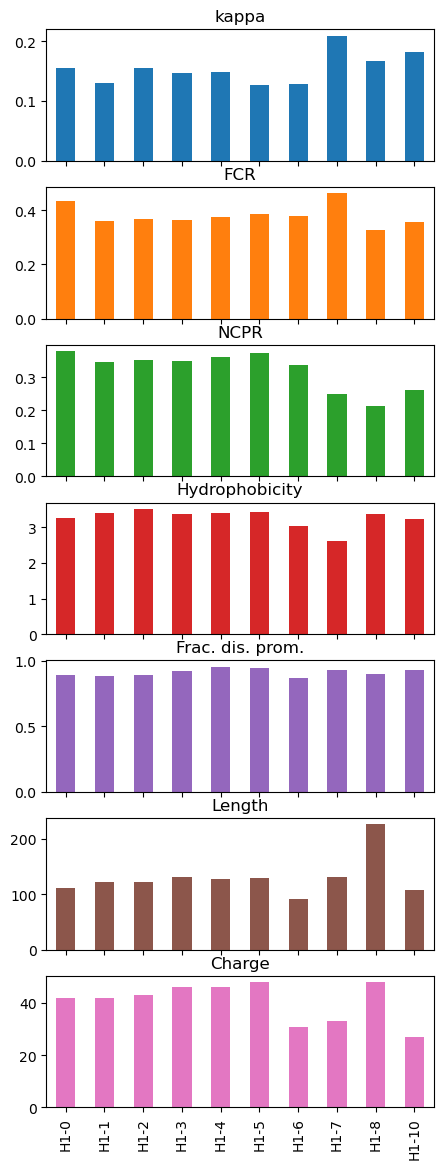

In [46]:
# Plotting results
cider.plot.bar(subplots=True, figsize=(5,14), legend=False)

### Structural descriptors

In [7]:
struc = pd.DataFrame(index=metadata.index)

In [8]:
# Computing radius of gyration
struc['Rg'] = metadata.apply(lambda row: analyse_utils.compute_rg(row.sequence, row.traj), axis=1)
struc['<Rg>'] = struc.apply(lambda row: row.Rg.mean(), axis=1)

In [9]:
# Computing end-to-end distance
struc['Re'] = metadata.apply(lambda row: md.compute_distances(row.traj, [[0, row.traj.n_atoms-1]]), axis=1)
struc['<Re>'] = struc.apply(lambda row: row.Re.mean(), axis=1)

In [10]:
# Computing asphericity
struc['b'] = metadata.apply(lambda row: md.asphericity(row.traj), axis=1)
struc['<b>'] = struc.apply(lambda row: row.b.mean(), axis=1)

In [11]:
# Computing acylindricity
struc['c'] = metadata.apply(lambda row: md.acylindricity(row.traj), axis=1)
struc['<c>'] = struc.apply(lambda row: row.c.mean(), axis=1)

In [12]:
# Computing shape relative anisotropy
struc['k'] = metadata.apply(lambda row: md.relative_shape_antisotropy(row.traj), axis=1)
struc['<k>'] = struc.apply(lambda row: row.k.mean(), axis=1)

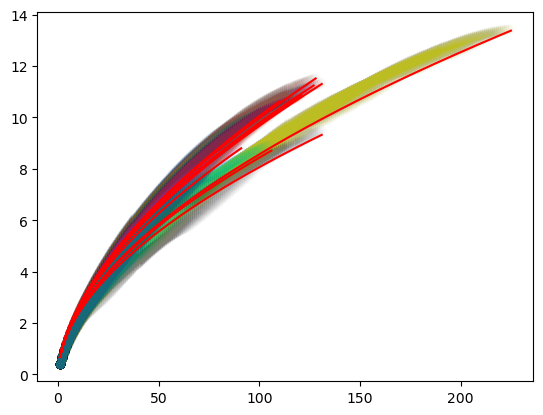

In [13]:
# Computing scaling exponent
struc['v'] = metadata.apply(lambda row: analyse_utils.compute_scaling_exponent(row.traj, plot=True, r0_fix=0.68, ij_cutoff=10)[0], axis=1)

In [38]:
# Displaying means
struc[[*struc.columns[struc.columns.str.contains('<')], 'v']]

,<Rg>,<Re>,<b>,<c>,<k>,v
H1-0,4.253284,10.601622,13.508141,1.944651,0.507601,0.584820
H1-1,4.385089,10.862257,14.264088,2.051293,0.501212,0.577323
H1-2,4.410966,10.932152,14.166067,2.092642,0.497458,0.577518
H1-3,4.579795,11.370305,15.263266,2.307578,0.490097,0.576464
H1-4,4.560733,11.285491,15.085126,2.274745,0.495111,0.579095
H1-5,4.646819,11.566401,15.977163,2.297390,0.502244,0.583122
H1-6,3.583788,8.944537,9.413485,1.372586,0.499599,0.567553
H1-7,3.912653,9.537118,10.799751,1.697025,0.452348,0.536951
H1-8,5.555322,13.460226,21.669481,3.529769,0.449731,0.550048
H1-10,3.617120,8.960501,9.408143,1.441036,0.474529,0.546705


array([<Axes: title={'center': '<Rg>'}>, <Axes: title={'center': '<Re>'}>,
       <Axes: title={'center': '<b>'}>, <Axes: title={'center': '<c>'}>,
       <Axes: title={'center': '<k>'}>, <Axes: title={'center': 'v'}>],
      dtype=object)

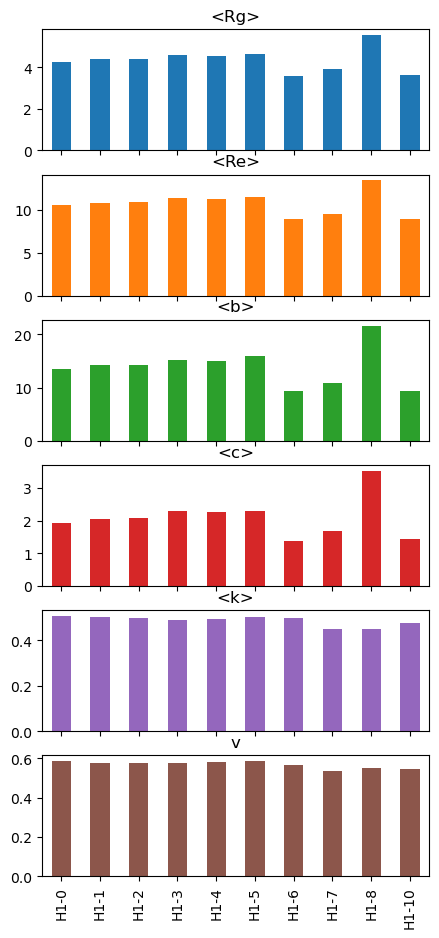

In [39]:
# Plotting means
struc[[*struc.columns[struc.columns.str.contains('<')], 'v']].plot.bar(subplots=True, figsize=(5,11), legend=False)

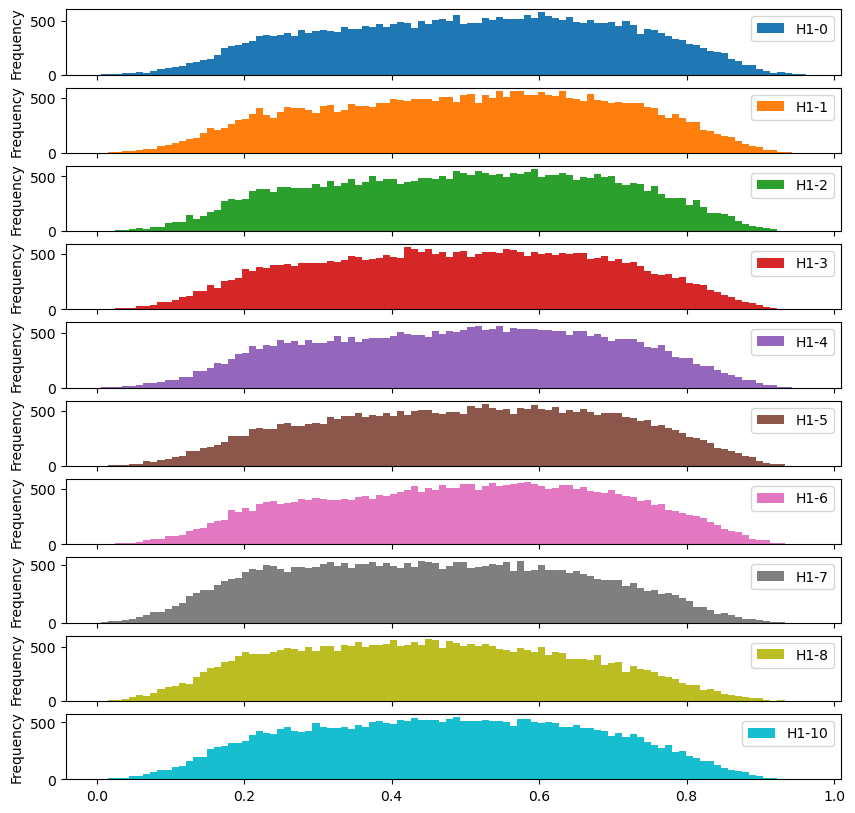

In [27]:
# Plotting distributions
measure = 'k'
axes = struc[[measure]].transpose().explode([*struc.index]).astype(float).plot.hist(bins=100, subplots=True, figsize=(10,10))